<a href="https://colab.research.google.com/github/AnweshaG-29/Financial-Risk-Analysis-and-Market-Dynamics-of-Indian-Firms/blob/main/VaR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import pandas_datareader as web
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime as dt
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
tickers = ['IDFCFIRSTB.NS','IFBIND.NS','IGL.NS','IMFA.NS']

In [ ]:
stocks = np.array([250,100,150,200])

In [ ]:
df = yf.download(tickers, start="2020-04-01", end="2024-09-30")['Close']
df

[*********************100%***********************]  4 of 4 completed


Ticker,IDFCFIRSTB.NS,IFBIND.NS,IGL.NS,IMFA.NS
Date,,,,
2020-04-01 00:00:00+00:00,20.600000,266.649994,390.549988,55.349998
2020-04-03 00:00:00+00:00,19.650000,268.250000,406.700012,56.750000
2020-04-07 00:00:00+00:00,20.450001,282.799988,435.850006,60.250000
2020-04-08 00:00:00+00:00,20.549999,299.649994,435.649994,60.075001
2020-04-09 00:00:00+00:00,22.049999,328.200012,458.649994,63.525002
...,...,...,...,...
2024-09-23 00:00:00+00:00,74.019997,1887.199951,546.950012,669.500000
2024-09-24 00:00:00+00:00,73.680000,1849.000000,550.150024,665.450012
2024-09-25 00:00:00+00:00,73.019997,1833.400024,549.549988,668.349976


In [ ]:
initial_investment=stocks*df.iloc[-1,:]
initial_investment

,2024-09-27 00:00:00+00:00
Ticker,
IDFCFIRSTB.NS,18547.500610
IFBIND.NS,180550.000000
IGL.NS,82425.000000
IMFA.NS,134459.997559


In [ ]:
returns=df.pct_change()
returns

Ticker,IDFCFIRSTB.NS,IFBIND.NS,IGL.NS,IMFA.NS
Date,,,,
2020-04-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2020-04-03 00:00:00+00:00,-0.046117,0.006000,0.041352,0.025294
2020-04-07 00:00:00+00:00,0.040713,0.054240,0.071674,0.061674
2020-04-08 00:00:00+00:00,0.004890,0.059583,-0.000459,-0.002905
2020-04-09 00:00:00+00:00,0.072993,0.095278,0.052795,0.057428
...,...,...,...,...
2024-09-23 00:00:00+00:00,0.016339,0.008147,0.014938,0.003297
2024-09-24 00:00:00+00:00,-0.004593,-0.020242,0.005851,-0.006049
2024-09-25 00:00:00+00:00,-0.008958,-0.008437,-0.001091,0.004358


In [ ]:
corr_matrix = returns.corr()
corr_matrix

Ticker,IDFCFIRSTB.NS,IFBIND.NS,IGL.NS,IMFA.NS
Ticker,,,,
IDFCFIRSTB.NS,1.000000,0.237725,0.286201,0.325920
IFBIND.NS,0.237725,1.000000,0.173480,0.215200
IGL.NS,0.286201,0.173480,1.000000,0.241341
IMFA.NS,0.325920,0.215200,0.241341,1.000000


In [ ]:
st_dev=returns.std()
st_dev

,0
Ticker,
IDFCFIRSTB.NS,0.023509
IFBIND.NS,0.029842
IGL.NS,0.019862
IMFA.NS,0.030049


In [ ]:
confidence_levels = np.arange(75, 101, 1)

def calculate_var(stock, std, initial_investment, confidence_levels):
  VaR = [
    st.norm.ppf(c / 100) * std * initial_investment
    for c in confidence_levels
    ]
  plt.figure(figsize=(10, 6))
  plt.plot(confidence_levels, VaR, label=stock, color='blue', linewidth=4 )
  plt.xlabel("Confidence Level (%)", fontsize=12)
  plt.ylabel("Value at Risk (₹)", fontsize=12)
  plt.title(f"Value at Risk (VaR) for {stock} Across Confidence Levels", fontsize=14)
  plt.legend(fontsize=12)
  plt.show()

<ipython-input-27-0269b423a889>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calculate_var(tickers[0], st_dev[0], initial_investment[0], confidence_levels)


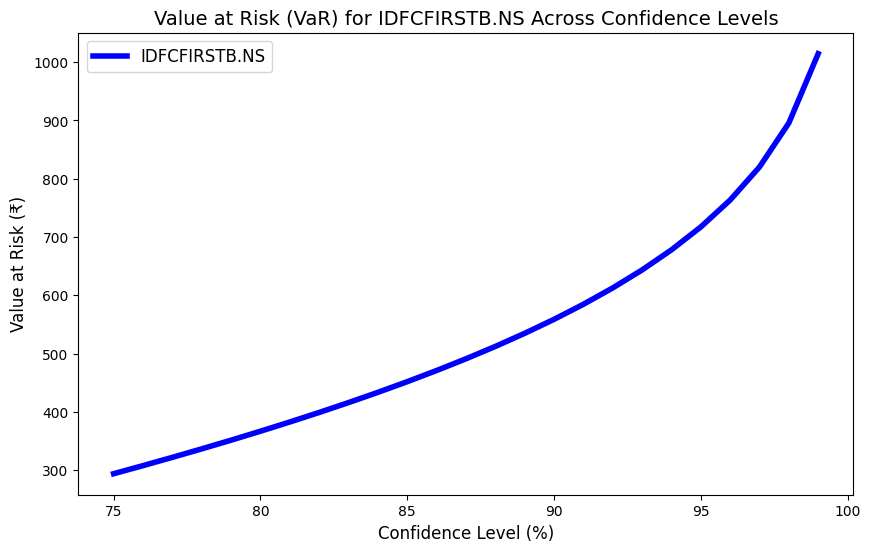

In [ ]:
calculate_var(tickers[0], st_dev[0], initial_investment[0], confidence_levels)

<ipython-input-28-cf39763b3011>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calculate_var(tickers[1], st_dev[1], initial_investment[1], confidence_levels)


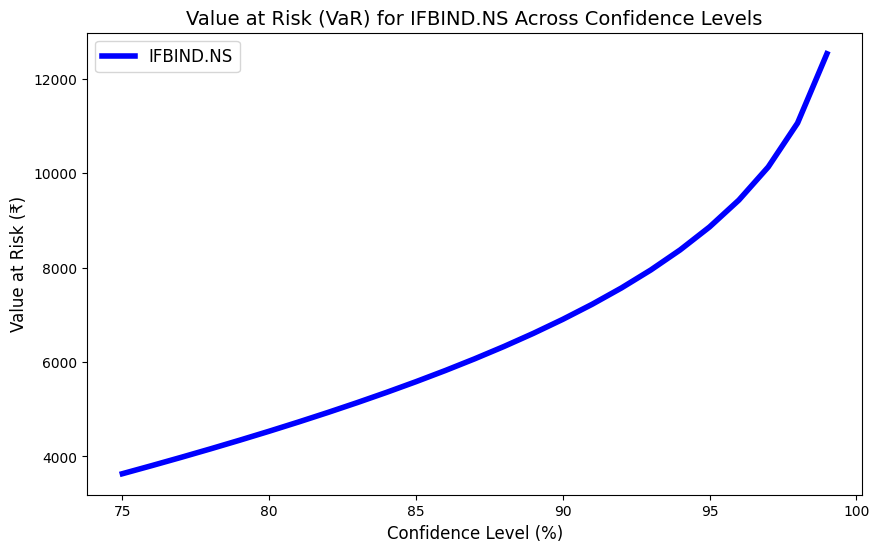

In [ ]:
calculate_var(tickers[1], st_dev[1], initial_investment[1], confidence_levels)

<ipython-input-29-4e78ffae9a51>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calculate_var(tickers[2], st_dev[2], initial_investment[2], confidence_levels)


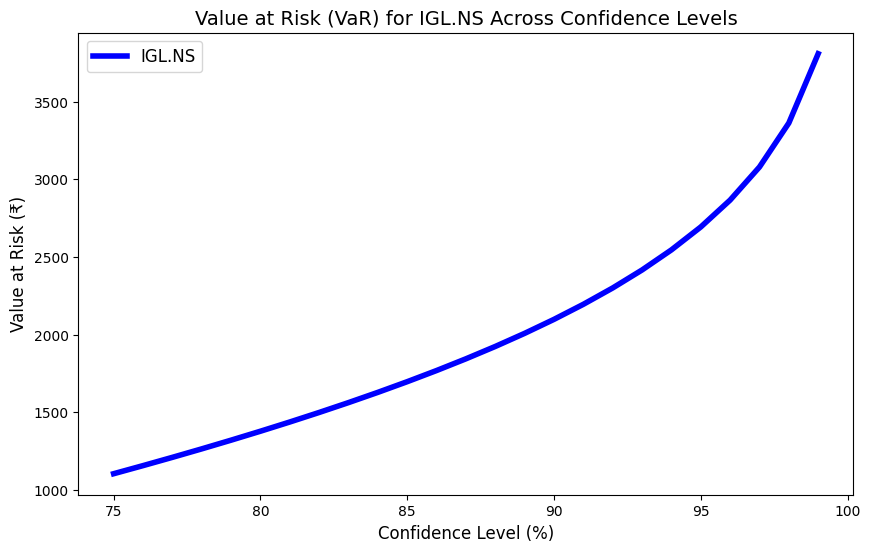

In [ ]:
calculate_var(tickers[2], st_dev[2], initial_investment[2], confidence_levels)

<ipython-input-30-2ff1998887ec>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calculate_var(tickers[3], st_dev[3], initial_investment[3], confidence_levels)


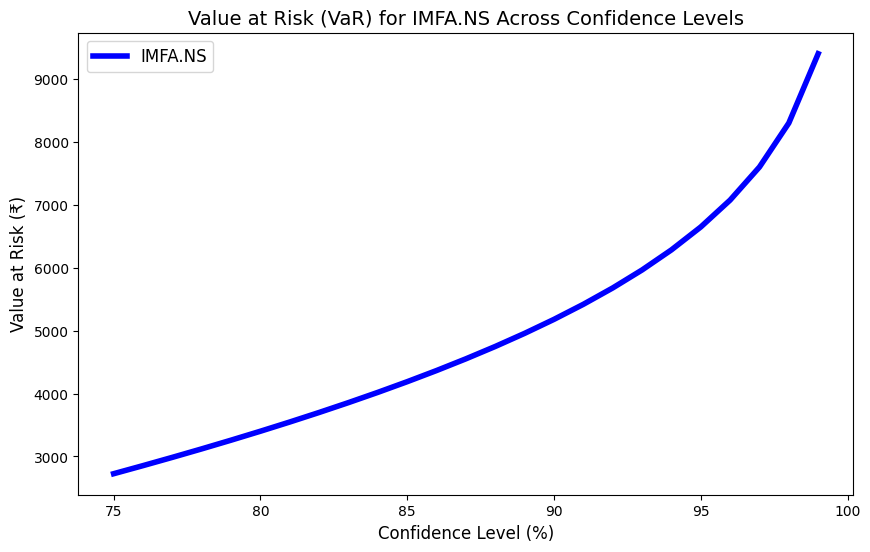

In [ ]:
calculate_var(tickers[3], st_dev[3], initial_investment[3], confidence_levels)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/

/content/drive/My Drive


In [ ]:
%cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
!pip install nbconvert
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get install pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [ ]:
!!jupyter nbconvert --to pdf VaR.ipynb

['[NbConvertApp] Converting notebook VaR.ipynb to pdf',
 '[NbConvertApp] Support files will be in VaR_files/',
 '[NbConvertApp] Making directory ./VaR_files',
 '[NbConvertApp] Writing 63973 bytes to notebook.tex',
 '[NbConvertApp] Building PDF',
 "[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']",
 "[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']",
 '[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations',
 '[NbConvertApp] PDF successfully created',
 '[NbConvertApp] Writing 59120 bytes to VaR.pdf']